# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import missingno as msno
import seaborn as sns 

# Partie 1

## Etape 1 : Charger les données

In [2]:
# Dossier contenant CSV
data_folder = Path("Data")

# Boucle sur chaque fichier CSV du dossier
for csv_path in data_folder.glob("*.csv"):
    # On récupère le nom du fichier sans extension
    var_name = f"{csv_path.stem}_df"
    # On lit le CSV dans un DataFrame
    df = pd.read_csv(csv_path)
    # On crée dynamiquement la variable dans l'espace global
    globals()[var_name] = df

In [3]:
# Get all variables in global scope that end with '_df'
dataframes = {name: var for name, var in globals().items() if name.endswith('_df')}

# Display DataFrame names
print("Available DataFrames:")
for df_name in dataframes.keys():
    print(f"- {df_name}")

Available DataFrames:
- EdStatsCountry_df
- EdStatsCountry-Series_df
- EdStatsData_df
- EdStatsFootNote_df
- EdStatsSeries_df


## Etape 2 : Collecter les informations basiques des jeux de données

In [4]:
def analyze_basic_info(df):
    """Analyze basic DataFrame information"""
    info = {
        "rows": df.shape[0],
        "columns": df.shape[1],
        "dtypes": df.dtypes.value_counts()
    }
    return info

def calculate_dataframe_size(df):
    """
    Calculate the memory usage of a DataFrame in different units
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to analyze
    
    Returns:
    --------
    dict
        Dictionary containing memory usage in bytes, KB, MB, and GB
    """
    # Get memory usage in bytes
    memory_bytes = df.memory_usage(deep=True).sum()
    
    # Convert to different units
    memory_kb = memory_bytes / 1024
    memory_mb = memory_kb / 1024
    memory_gb = memory_mb / 1024
    
    return {
        'bytes': f"{memory_bytes:,.0f} bytes",
        'kilobytes': f"{memory_kb:,.2f} KB",
        'megabytes': f"{memory_mb:,.2f} MB",
        'gigabytes': f"{memory_gb:,.2f} GB"
    }

def identify_row_structure(df):
    """Identify what each row represents"""
    country_cols = [col for col in df.columns if 'country' in col.lower()]
    indicator_cols = [col for col in df.columns if 'indicator' in col.lower()]
    
    if country_cols and indicator_cols:
        return "combination of country and indicator", country_cols, indicator_cols
    elif country_cols:
        return "country", country_cols, []
    elif indicator_cols:
        return "indicator", [], indicator_cols
    return "unknown structure", [], []

def analyze_missing_values(df, threshold=50):
    """Analyze and handle missing values"""
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    cols_to_drop = missing_pct[missing_pct > threshold].index
    
    return {
        "missing_percentages": missing_pct[missing_pct > 0],
        "columns_to_drop": cols_to_drop
    }

def analyze_numerical_columns(df):
    """Analyze numerical columns"""
    numerical_cols = df.select_dtypes(include=['float64', 'int64'])
    if not numerical_cols.empty:
        return numerical_cols.describe()
    return None

def analyze_categorical_columns(df):
    """Analyze categorical columns"""
    categorical_cols = df.select_dtypes(include=['object'])
    results = {}
    for col in categorical_cols:
        unique_values = df[col].nunique()
        value_counts = df[col].value_counts().head()
        results[col] = {
            "unique_values": unique_values,
            "top_values": value_counts
        }
    return results

def analyze_dataframe(df, name):
    """Main function to analyze a DataFrame"""
    print(f"\n{'='*50}")
    print(f"Analysis of {name}")
    print(f"{'='*50}")
    
    # 1. Basic Information
    basic_info = analyze_basic_info(df)
    print("\n📊 Basic Information:")
    print(f"Rows: {basic_info['rows']:,}")
    print(f"Columns: {basic_info['columns']:,}")
    # Calculate and display DataFrame size
    size_info = calculate_dataframe_size(df)
    print("\n💾 Memory Usage:")
    print(f"Size: {size_info['megabytes']} ({size_info['bytes']})")
    
    # 2. Row Structure
    structure, country_cols, indicator_cols = identify_row_structure(df)
    print(f"\n🔍 Row Structure: Each row represents a {structure}")
    
    # 3. Duplicates
    duplicates = df.duplicated().sum()
    print(f"\n🔄 Duplicates found: {duplicates:,}")
    if duplicates > 0:
        df = df.drop_duplicates()
    
    # 4. Missing Values
    missing_analysis = analyze_missing_values(df)
    msno.matrix(df)
    plt.show()

    print("\n❓ Missing Values (%):")
    print(missing_analysis["missing_percentages"])
    
    if len(missing_analysis["columns_to_drop"]) > 0:
        # df = df.drop(columns=missing_analysis["columns_to_drop"])
        print(f"\nTo be dropped columns ?: {', '.join(missing_analysis['columns_to_drop'])}")
    
    # 5. Numerical Analysis
    num_stats = analyze_numerical_columns(df)
    if num_stats is not None:
        print("\n📈 Numerical Columns Statistics:")
        print(num_stats)
    
    # 6. Categorical Analysis
    cat_stats = analyze_categorical_columns(df)
    if cat_stats:
        print("\n📊 Categorical Columns Analysis:")
        for col, stats in cat_stats.items():
            print(f"\n{col} - {stats['unique_values']} unique values")
            print(stats['top_values'])
    
    return df

### Analyse EdStatsCountry_df


Analysis of EdStatsCountry_df

📊 Basic Information:
Rows: 241
Columns: 32

💾 Memory Usage:
Size: 0.41 MB (425,187 bytes)

🔍 Row Structure: Each row represents a country

🔄 Duplicates found: 0


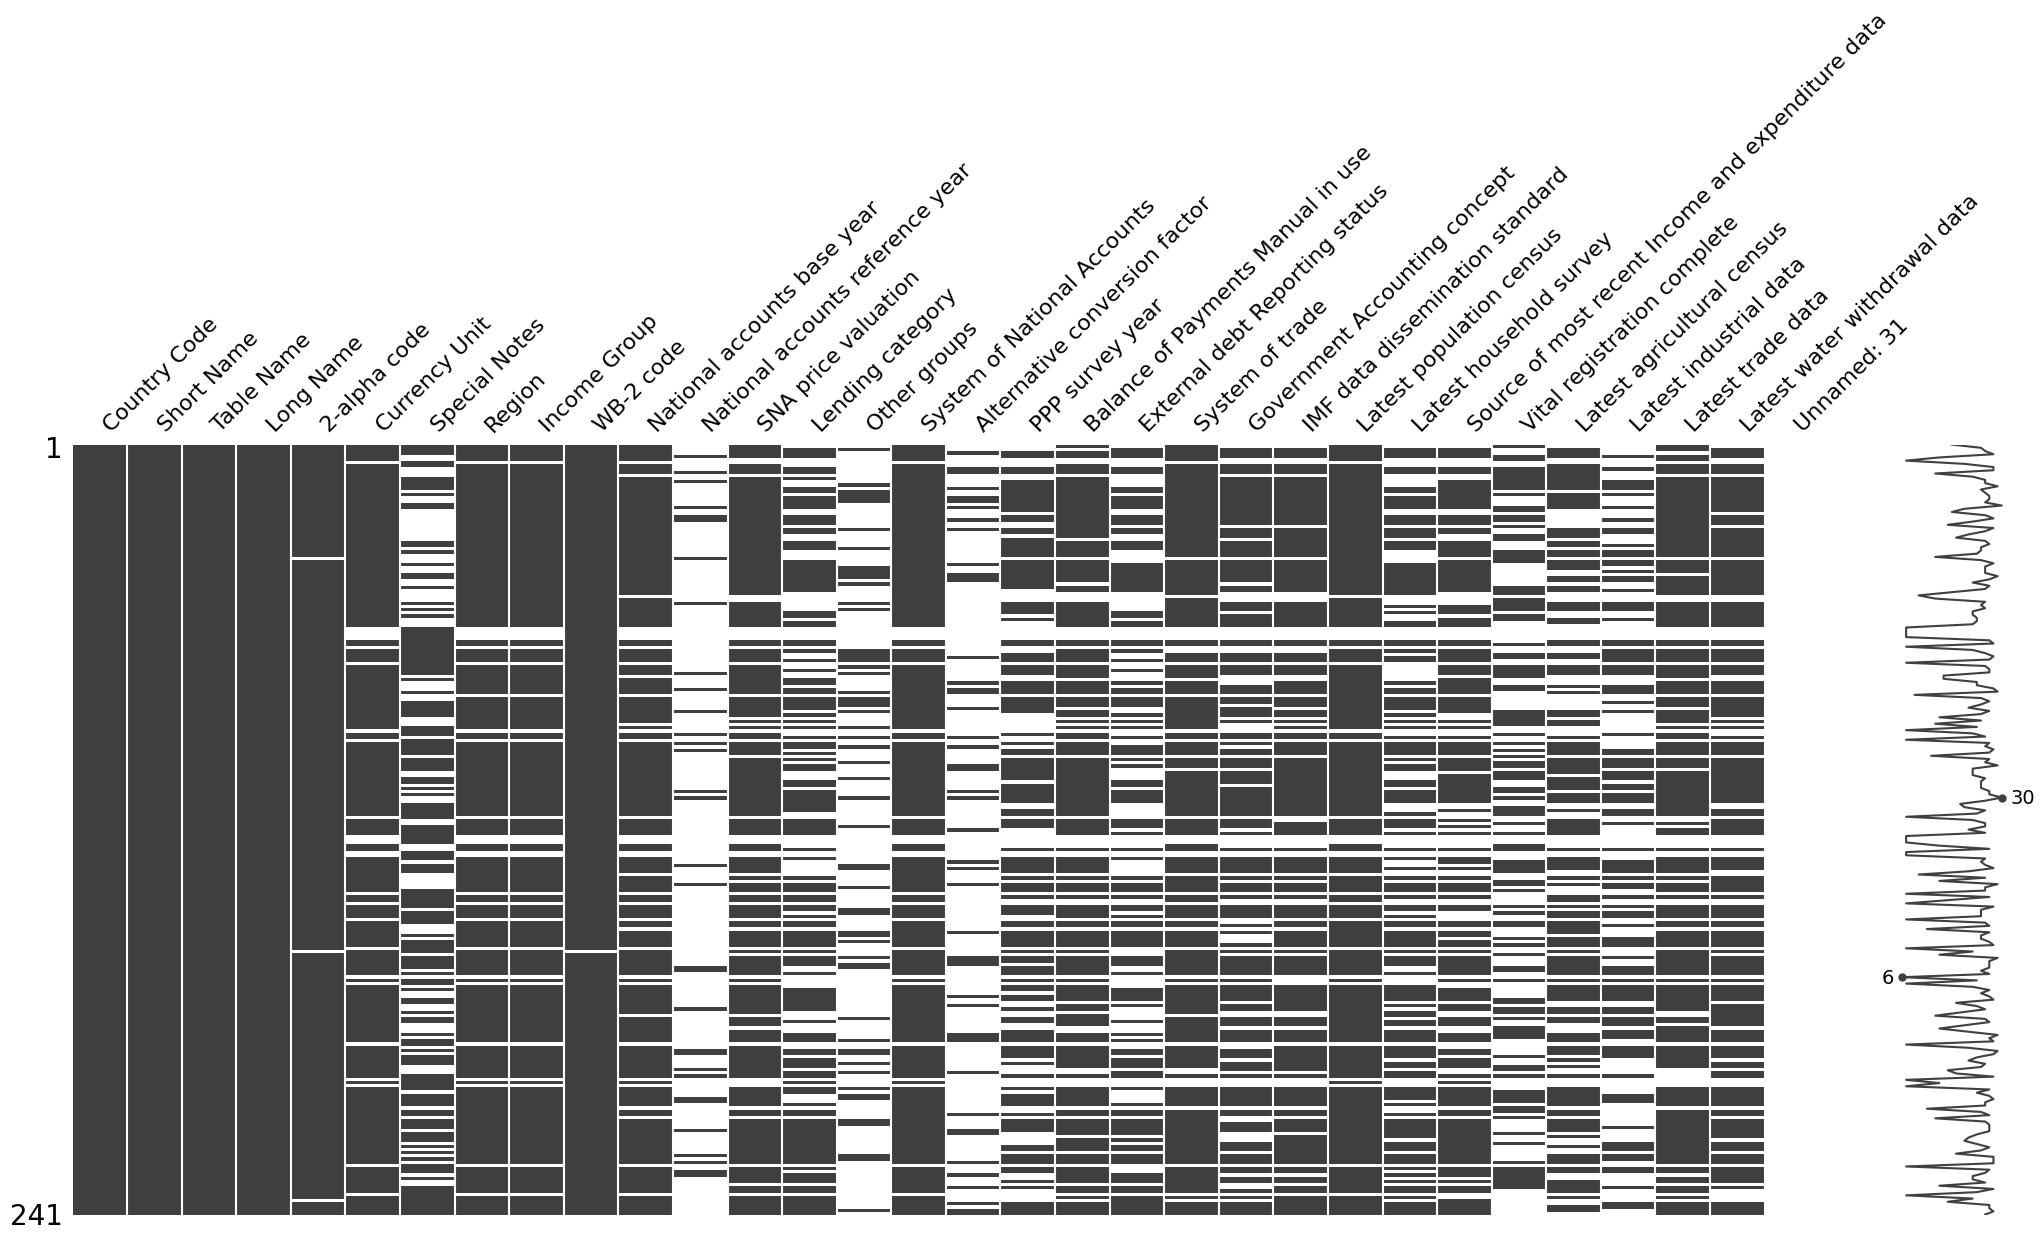


❓ Missing Values (%):
2-alpha code                                           1.244813
Currency Unit                                         10.788382
Special Notes                                         39.834025
Region                                                11.203320
Income Group                                          11.203320
WB-2 code                                              0.414938
National accounts base year                           14.937759
National accounts reference year                      86.721992
SNA price valuation                                   18.257261
Lending category                                      40.248963
Other groups                                          75.933610
System of National Accounts                           10.788382
Alternative conversion factor                         80.497925
PPP survey year                                       39.834025
Balance of Payments Manual in use                     24.896266
External debt Rep

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,...,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005,NaN
238,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000,NaN
239,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002,NaN


In [5]:
analyze_dataframe(dataframes['EdStatsCountry_df'], "EdStatsCountry_df")

Contient des indicateurs sur des pays

### Analyse EdStatsCountry-Series_df


Analysis of EdStatsCountry-Series_df

📊 Basic Information:
Rows: 613
Columns: 4

💾 Memory Usage:
Size: 0.13 MB (137,409 bytes)

🔍 Row Structure: Each row represents a country

🔄 Duplicates found: 0


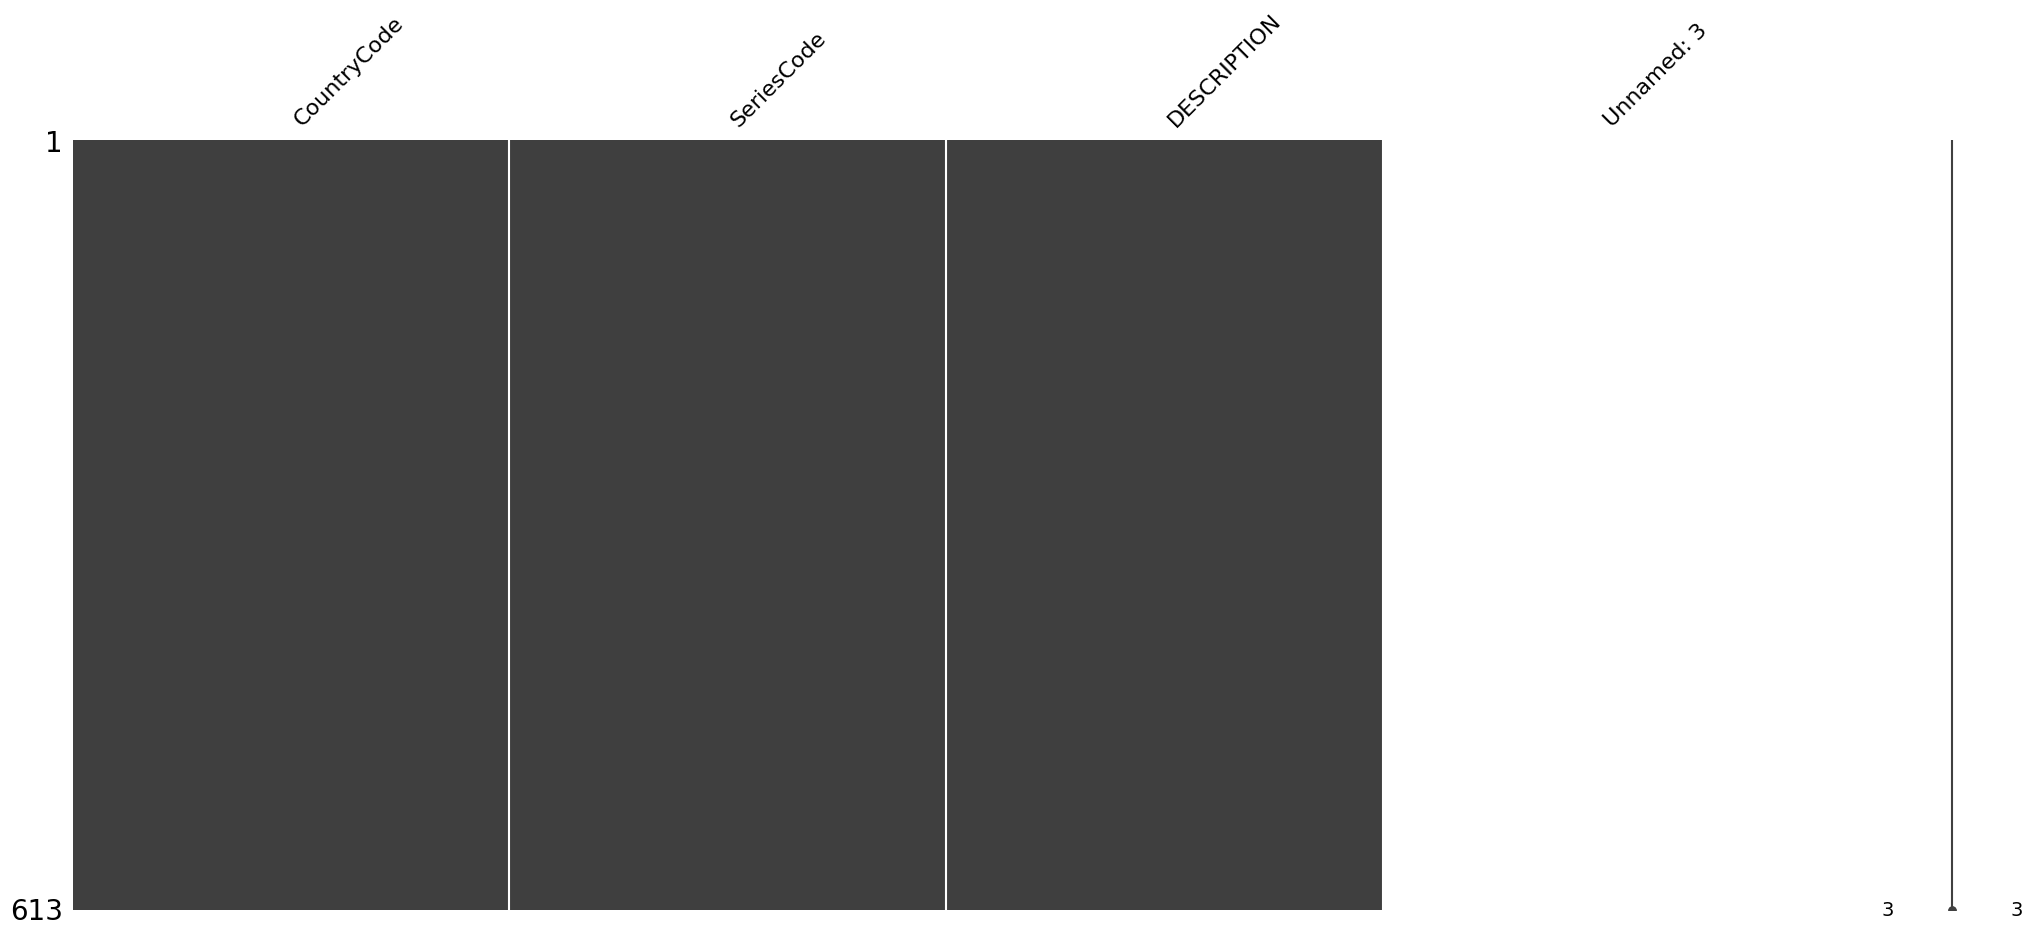


❓ Missing Values (%):
Unnamed: 3    100.0
dtype: float64

To be dropped columns ?: Unnamed: 3

📈 Numerical Columns Statistics:
       Unnamed: 3
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN

📊 Categorical Columns Analysis:

CountryCode - 211 unique values
CountryCode
MDA    18
GEO    18
CYP    12
SRB    12
MUS    12
Name: count, dtype: int64

SeriesCode - 21 unique values
SeriesCode
SP.POP.TOTL          211
SP.POP.GROW          211
NY.GDP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.KD     19
NY.GNP.PCAP.PP.CD     19
Name: count, dtype: int64

DESCRIPTION - 97 unique values
DESCRIPTION
Data sources : United Nations World Population Prospects                154
Data sources: United Nations World Population Prospects                 137
Estimates are based on regression.                                       84
Data sources : Eurostat                                                  54
Derived using r

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
...,...,...,...,...
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United...",NaN
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [6]:
analyze_dataframe(dataframes['EdStatsCountry-Series_df'], "EdStatsCountry-Series_df")

### Analyse EdStatsData_df


Analysis of EdStatsData_df

📊 Basic Information:
Rows: 886,930
Columns: 70

💾 Memory Usage:
Size: 706.25 MB (740,560,503 bytes)

🔍 Row Structure: Each row represents a combination of country and indicator

🔄 Duplicates found: 0


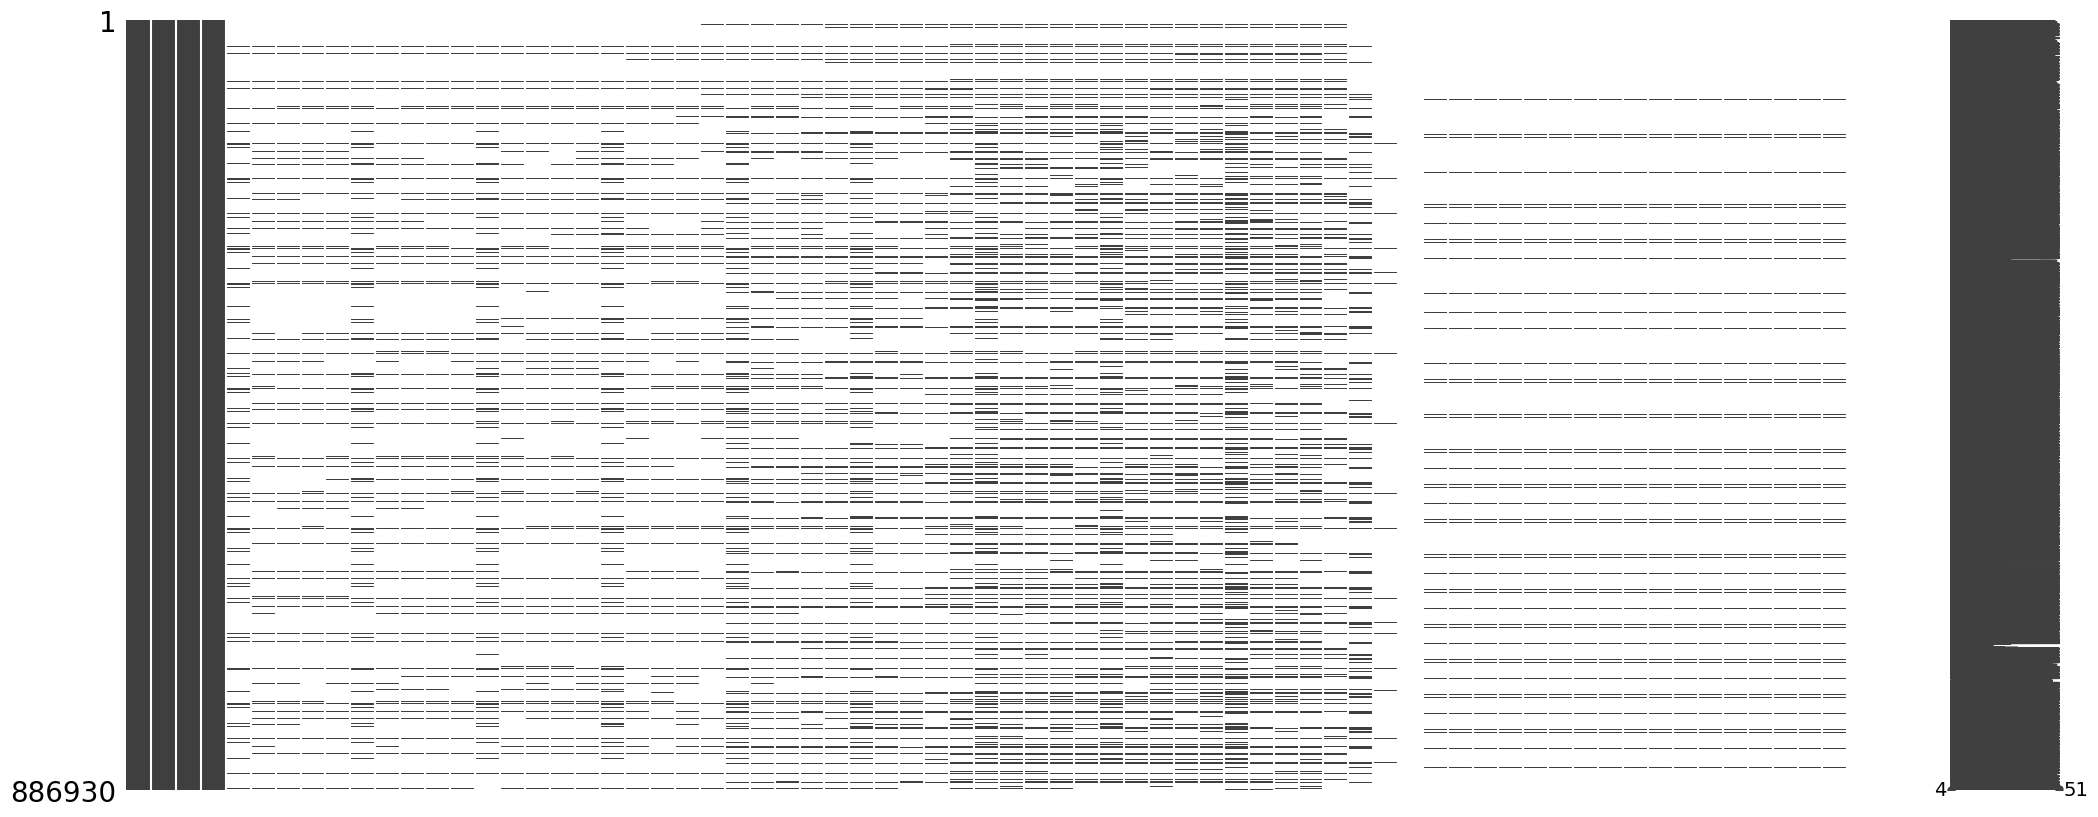


❓ Missing Values (%):
1970            91.849639
1971            95.993258
1972            95.984012
1973            95.992356
1974            95.971497
                  ...    
2085            94.200670
2090            94.200670
2095            94.200670
2100            94.200670
Unnamed: 69    100.000000
Length: 66, dtype: float64

To be dropped columns ?: 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100, Unnamed: 69

📈 Numerical Columns Statistics:
               1970          1971          1972          1973          1974  \
count  7.228800e+04  3.553700e+04  3.561900e+04  3.554500e+04  3.573000e+04   
mean   1.974772e+09  4.253638e+09  4.592365e+

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
analyze_dataframe(dataframes['EdStatsData_df'], "EdStatsData_df")

In [8]:
dataframes['EdStatsData_df'].duplicated().sum()

np.int64(0)

### Analyse EdStatsFootNote_df


Analysis of EdStatsFootNote_df

📊 Basic Information:
Rows: 643,638
Columns: 5

💾 Memory Usage:
Size: 154.77 MB (162,292,160 bytes)

🔍 Row Structure: Each row represents a country

🔄 Duplicates found: 0


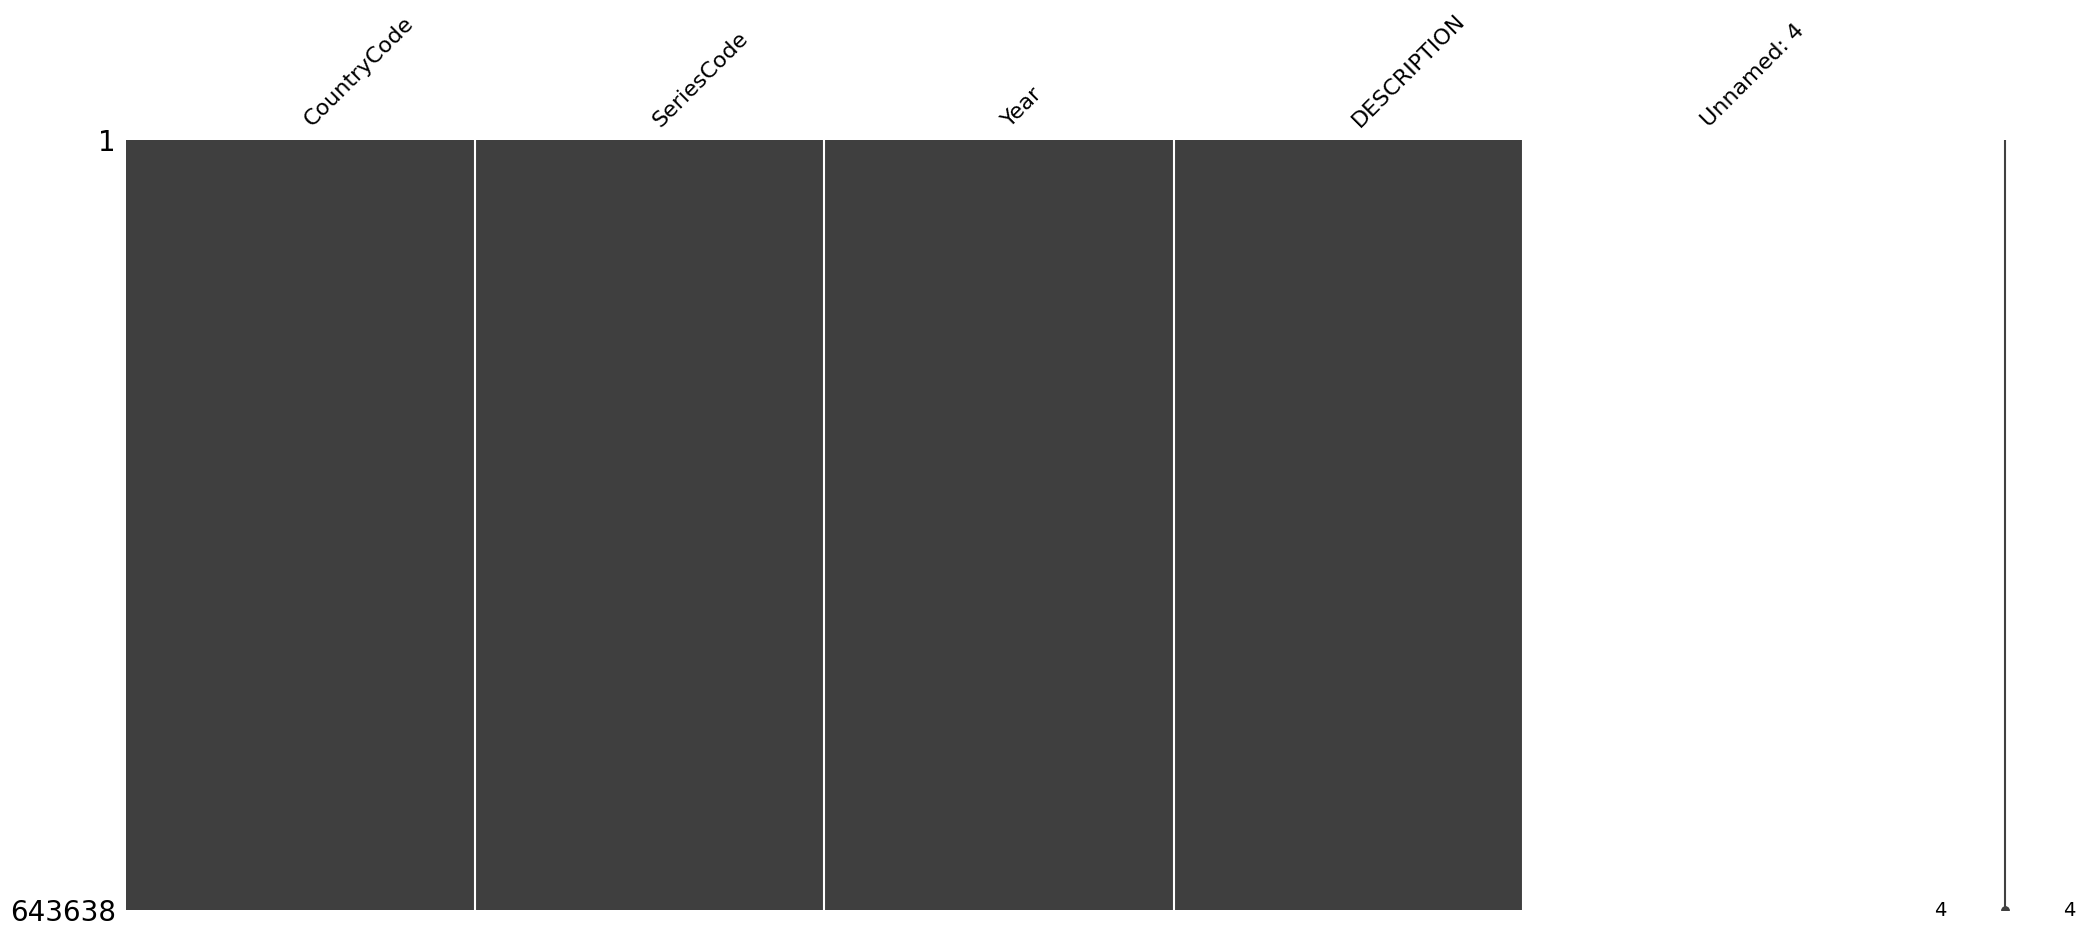


❓ Missing Values (%):
Unnamed: 4    100.0
dtype: float64

To be dropped columns ?: Unnamed: 4

📈 Numerical Columns Statistics:
       Unnamed: 4
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN

📊 Categorical Columns Analysis:

CountryCode - 239 unique values
CountryCode
LIC    7320
CYP    7183
LDC    6481
SSA    6389
SSF    6336
Name: count, dtype: int64

SeriesCode - 1558 unique values
SeriesCode
SH.DYN.MORT    9226
SE.PRM.AGES    8771
SE.PRM.DURS    8771
SE.SEC.DURS    8619
SE.SEC.AGES    8581
Name: count, dtype: int64

Year - 56 unique values
Year
YR2004    27128
YR2005    25992
YR2002    25687
YR2003    25683
YR2000    25093
Name: count, dtype: int64

DESCRIPTION - 9102 unique values
DESCRIPTION
Country Data                                      191188
UNESCO Institute for Statistics (UIS) estimate    171527
Estimated                                         117155
UIS Estimation         

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN
...,...,...,...,...,...
643633,ZWE,SH.DYN.MORT,YR2007,Uncertainty bound is 91.6 - 109.3,NaN
643634,ZWE,SH.DYN.MORT,YR2014,Uncertainty bound is 54.3 - 76,NaN
643635,ZWE,SH.DYN.MORT,YR2015,Uncertainty bound is 48.3 - 73.3,NaN
643636,ZWE,SH.DYN.MORT,YR2017,5-year average value between 0s and 5s,NaN


In [9]:
analyze_dataframe(dataframes['EdStatsFootNote_df'], "EdStatsFootNote_df") 

### Analyse EdStatsSeries_df


Analysis of EdStatsSeries_df

📊 Basic Information:
Rows: 3,665
Columns: 21

💾 Memory Usage:
Size: 6.15 MB (6,447,493 bytes)

🔍 Row Structure: Each row represents a indicator

🔄 Duplicates found: 0


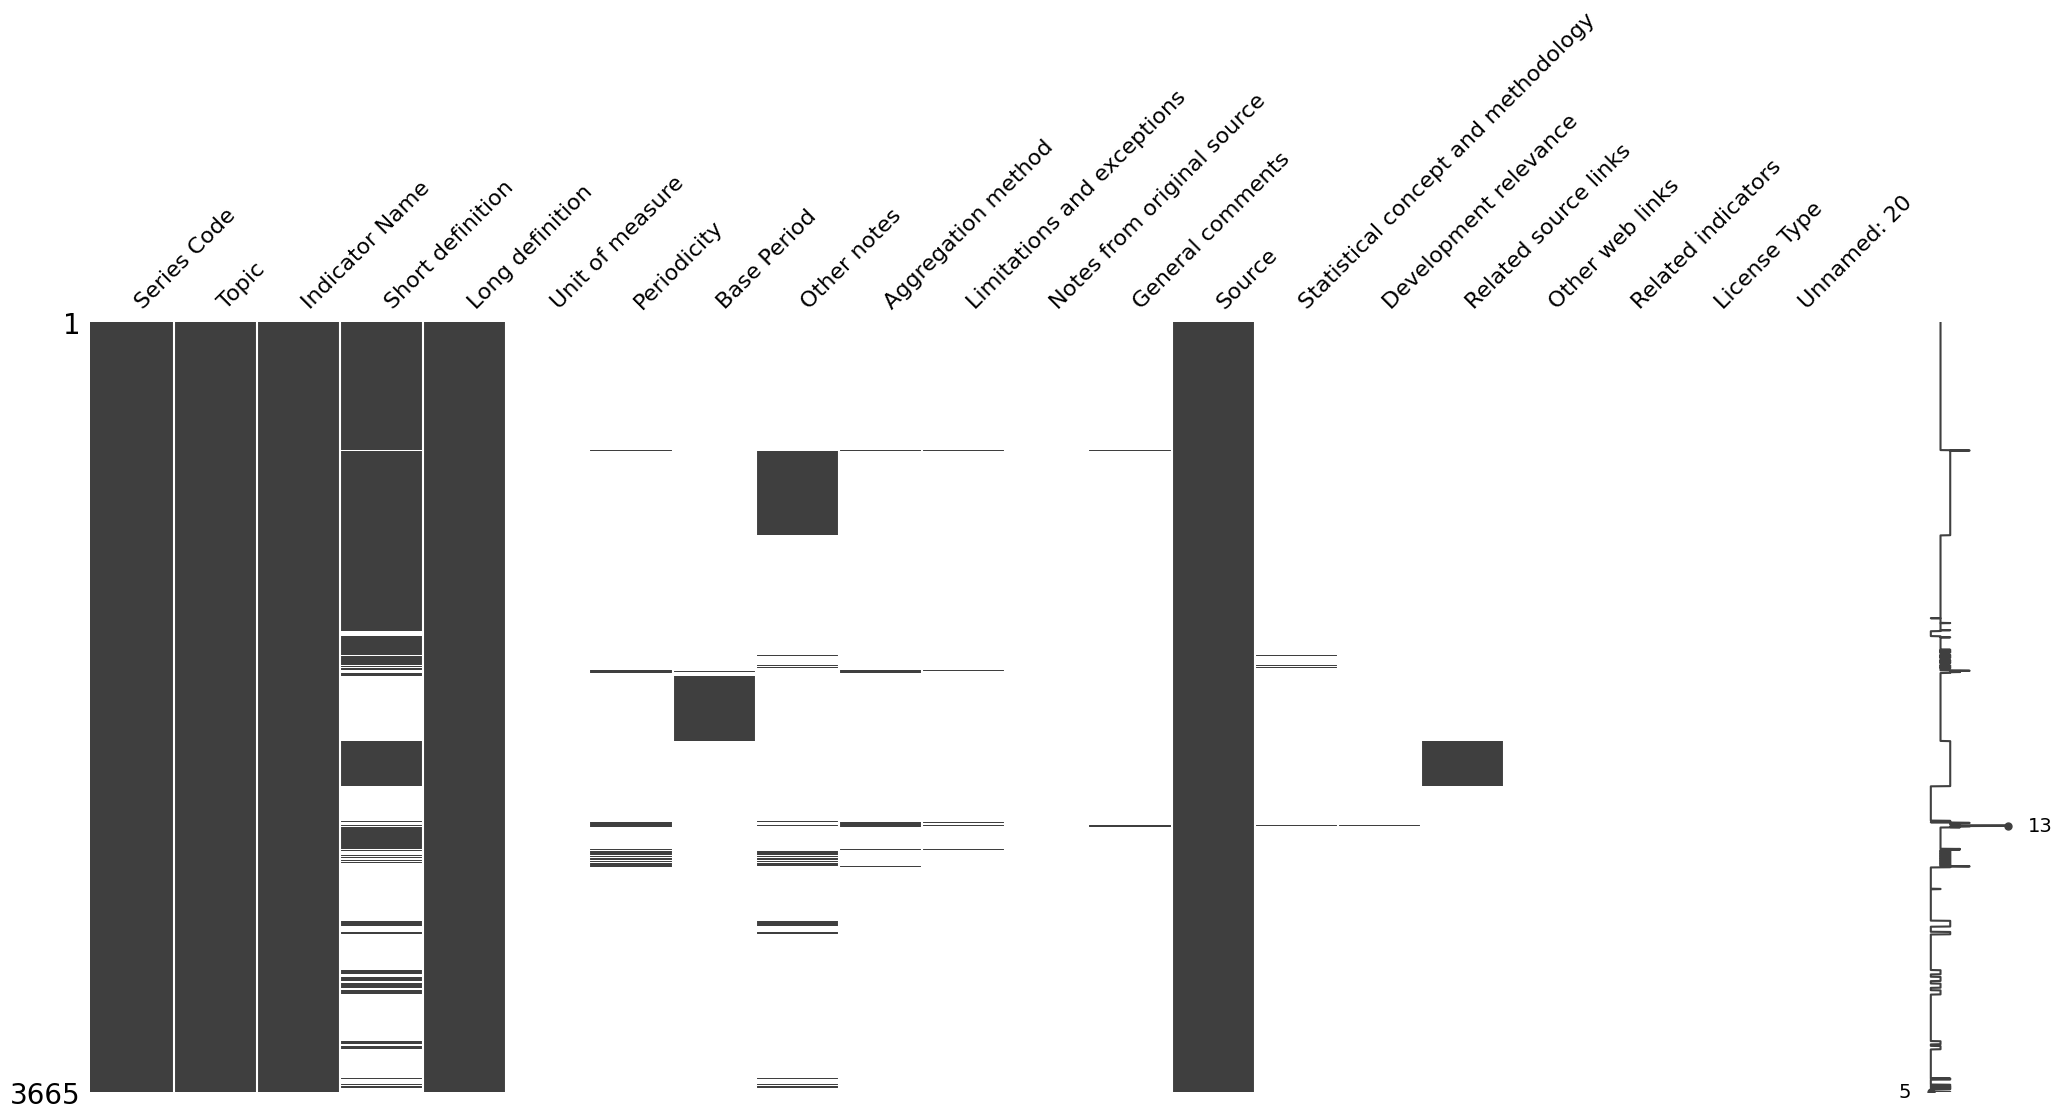


❓ Missing Values (%):
Short definition                        41.173261
Unit of measure                        100.000000
Periodicity                             97.298772
Base Period                             91.432469
Other notes                             84.938608
Aggregation method                      98.717599
Limitations and exceptions              99.618008
Notes from original source             100.000000
General comments                        99.618008
Statistical concept and methodology     99.372442
Development relevance                   99.918145
Related source links                    94.133697
Other web links                        100.000000
Related indicators                     100.000000
License Type                           100.000000
Unnamed: 20                            100.000000
dtype: float64

To be dropped columns ?: Unit of measure, Periodicity, Base Period, Other notes, Aggregation method, Limitations and exceptions, Notes from original source, Gene

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Secondary,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
analyze_dataframe(dataframes['EdStatsSeries_df'], "EdStatsSeries_df")

## Etape 3 : Réaliser votre premier nettoyage
### Résultat attendu 

* Code permettant de filtrer les faux pays des tables où cela fait sens (Country, Country-Series, FootNote et Data).

* Markdown associé au code pour expliquer l’approche.

### Instructions 
* Regardez de plus près les lignes du fichier Country pour identifier des faux pays.

* Supprimez les lignes correspondantes du dataframe contenant la donnée Country.

* Utilisez les 2 méthodes suivantes pour supprimer les faux pays des autres dataframes : 
    * En stockant les faux pays dans une liste qui sera utilisée pour le filtrage des différents dataframes. 
    * En utilisant un inner join entre les pays du dataframe Country nettoyé, et les autres dataframes.

In [11]:
# 1. Identifier les faux pays dans EdStatsCountry_df
# Les faux pays sont souvent identifiés par une région générique ou un code pays manquant
# On considère comme faux pays ceux dont la colonne 'Region' est manquante ou égale à 'Aggregates'
fake_countries_mask = (dataframes['EdStatsCountry_df']['Region'].isna()) | \
                 (dataframes['EdStatsCountry_df']['Region'] == 'Aggregates')
fake_countries = dataframes['EdStatsCountry_df'].loc[fake_countries_mask, 'Country Code'].tolist()

# Print des faux pays pour vérification dans un tableau avec le Short Name et le Long Name
faux_pays_df = dataframes['EdStatsCountry_df'][dataframes['EdStatsCountry_df']['Country Code'].isin(fake_countries)][['Country Code', 'Short Name', 'Long Name']]
print("\nFaux pays détectés :")
print(faux_pays_df) 


# 2. Nettoyer EdStatsCountry_df en supprimant les faux pays
country_clean_df = dataframes['EdStatsCountry_df'][~dataframes['EdStatsCountry_df']['Country Code'].isin(fake_countries)].copy()

# 3. Nettoyer les autres dataframes avec la liste des faux pays
country_series_clean_df = dataframes['EdStatsCountry-Series_df'][~dataframes['EdStatsCountry-Series_df']['CountryCode'].isin(fake_countries)].copy()
footnote_clean_df = dataframes['EdStatsFootNote_df'][~dataframes['EdStatsFootNote_df']['CountryCode'].isin(fake_countries)].copy()
data_clean_df = dataframes['EdStatsData_df'][~dataframes['EdStatsData_df']['Country Code'].isin(fake_countries)].copy()

# 4. Nettoyage alternatif par inner join (exemple pour EdStatsData_df)
valid_country_codes = set(country_clean_df['Country Code'])
data_clean_df_v2 = dataframes['EdStatsData_df'][dataframes['EdStatsData_df']['Country Code'].isin(valid_country_codes)].copy()

# 5. Stocker les dataframes nettoyés dans un dictionnaire pour usage ultérieur
cleaned_dataframes = {
    'EdStatsCountry_df': country_clean_df,
    'EdStatsCountry-Series_df': country_series_clean_df,
    'EdStatsFootNote_df': footnote_clean_df,
    'EdStatsData_df': data_clean_df
}

print(f"Faux pays détectés ({len(fake_countries)}): {fake_countries}")
print(f"EdStatsCountry_df nettoyé: {country_clean_df.shape}")
print(f"EdStatsCountry-Series_df nettoyé: {country_series_clean_df.shape}")
print(f"EdStatsFootNote_df nettoyé: {footnote_clean_df.shape}")
print(f"EdStatsData_df nettoyé: {data_clean_df.shape}")


Faux pays détectés :
    Country Code                                      Short Name  \
5            ARB                                      Arab World   
57           EAP           East Asia & Pacific (developing only)   
58           EAS         East Asia & Pacific (all income levels)   
59           ECA         Europe & Central Asia (developing only)   
60           ECS       Europe & Central Asia (all income levels)   
63           EMU                                       Euro area   
68           EUU                                  European Union   
78           GIB                                       Gibraltar   
89           HIC                                     High income   
92           HPC          Heavily indebted poor countries (HIPC)   
116          LAC     Latin America & Caribbean (developing only)   
122          LCN   Latin America & Caribbean (all income levels)   
123          LDC    Least developed countries: UN classification   
124          LIC          

# Exercice 2

### Résultat attendu 
Du code et du markdown dans le même Jupyter Notebook, permettant de reproduire les réponses aux instructions ci-dessous.

### Instructions 
* Parmi les jeux de données centrés sur les indicateurs, identifiez la colonne qui décrit la catégorie métier à laquelle appartient chaque indicateur.

* Gardez les catégories qui font sens par rapport à la demande de Mark et l’objectif du projet et supprimez les autres.

* Calculez le nombre d’indicateurs restants.

* Filtrez l’ensemble des jeux de données pour ne garder que les indicateurs sélectionnés.
* Dans le fichier Data, interprétez les colonnes représentant les années. 
* Pourquoi avons-nous des valeurs d’indicateur pour des années futures ? 
Sur la base de votre compréhension de la problématique métier, filtrez les années en conséquence.

## Etape 1 : Réduisez le périmètre en utilisant une approche métier

In [13]:
import datetime

# ## Identification de la colonne de catégorie métier

# Dans EdStatsSeries_df, la colonne 'Topic' décrit la catégorie métier de chaque indicateur.
topic_counts = dataframes['EdStatsSeries_df']['Topic'].value_counts()
print("Catégories métier disponibles :")
print(topic_counts)

# Supposons que, pour le projet d'expansion internationale, seules les catégories liées à l'accès, la qualité et les dépenses d'éducation sont pertinentes.
categories_retenues = [
    'Access', 'Quality', 'Expenditures', 'Attainment', 'Completion', 'Participation'
]

# Filtrage des indicateurs selon les catégories retenues
series_filtered = dataframes['EdStatsSeries_df'][
    dataframes['EdStatsSeries_df']['Topic'].isin(categories_retenues)
].copy()

print(f"\nNombre d'indicateurs après filtrage : {series_filtered.shape[0]}")

# Liste des codes d'indicateurs à conserver
indicators_to_keep = set(series_filtered['Series Code'])

# Filtrage des autres jeux de données sur ces indicateurs
data_filtered = cleaned_dataframes['EdStatsData_df'][
    cleaned_dataframes['EdStatsData_df']['Indicator Code'].isin(indicators_to_keep)
].copy()
footnote_filtered = cleaned_dataframes['EdStatsFootNote_df'][
    cleaned_dataframes['EdStatsFootNote_df']['SeriesCode'].isin(indicators_to_keep)
].copy()
country_series_filtered = cleaned_dataframes['EdStatsCountry-Series_df'][
    cleaned_dataframes['EdStatsCountry-Series_df']['SeriesCode'].isin(indicators_to_keep)
].copy()

print(f"EdStatsData_df : {cleaned_dataframes['EdStatsData_df'].shape[0]} -> {data_filtered.shape[0]}")
print(f"EdStatsFootNote_df : {cleaned_dataframes['EdStatsFootNote_df'].shape[0]} -> {footnote_filtered.shape[0]}")
print(f"EdStatsCountry-Series_df : {cleaned_dataframes['EdStatsCountry-Series_df'].shape[0]} -> {country_series_filtered.shape[0]}")

# ## Interprétation des colonnes années dans EdStatsData_df

# Les colonnes années sont de type string représentant des années (ex: '1970', ..., '2100')
annees = [col for col in data_filtered.columns if col.isdigit()]
print(f"\nAnnées disponibles dans EdStatsData_df : {annees[:5]} ... {annees[-5:]}")

# Pourquoi des années futures ? 
# --> Il s'agit probablement de projections ou de scénarios prospectifs, pas de données observées.

# Pour l'analyse, on garde uniquement les années jusqu'à l'année courante (par exemple 2023)
current_year = datetime.datetime.now().year
annees_valides = [an for an in annees if int(an) <= current_year]

# Filtrage des colonnes années pertinentes
colonnes_a_garder = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + annees_valides
data_filtered_final = data_filtered[colonnes_a_garder].copy()

print(f"\nNombre d'années conservées : {len(annees_valides)}")
print(f"Colonnes finales : {data_filtered_final.columns.tolist()[:8]} ... {data_filtered_final.columns.tolist()[-5:]}")

Catégories métier disponibles :
Topic
Learning Outcomes                                                                               1046
Attainment                                                                                       733
Education Equality                                                                               426
Secondary                                                                                        256
Primary                                                                                          248
Population                                                                                       213
Tertiary                                                                                         158
Teachers                                                                                         137
Expenditures                                                                                      93
Engaging the Private Sector (SABER)                  